In [9]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
import glob
import os
%matplotlib inline

In [10]:
#pip install ipympl

In [11]:
samples = ['IN','PB2','SNPB','IN2BI','IN4BI', 'SN'] #superconducting
controls = ["PTFE", "Cu"] #non-superconducting

<ipython-input-12-3146914d5f09>:93: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

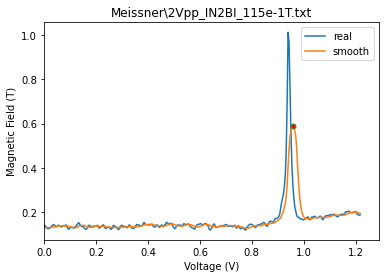

<Figure size 432x288 with 0 Axes>

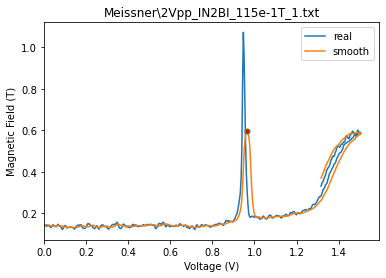

<Figure size 432x288 with 0 Axes>

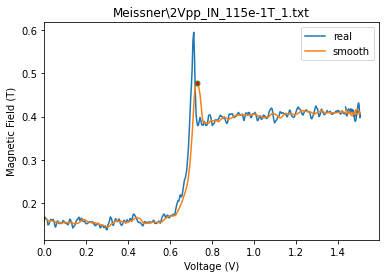

<Figure size 432x288 with 0 Axes>

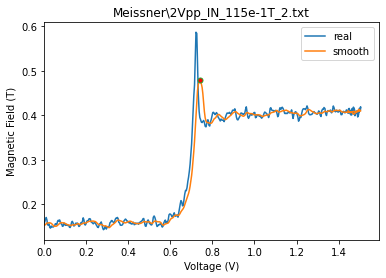

<Figure size 432x288 with 0 Axes>

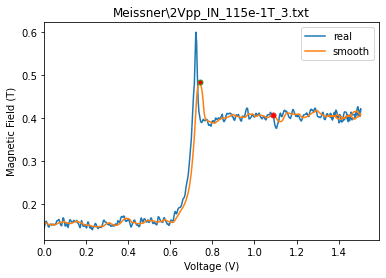

<Figure size 432x288 with 0 Axes>

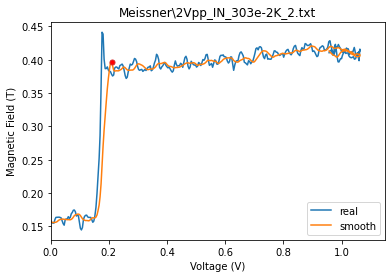

<Figure size 432x288 with 0 Axes>

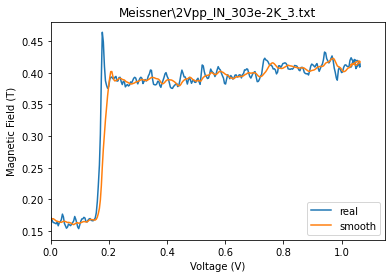

<Figure size 432x288 with 0 Axes>

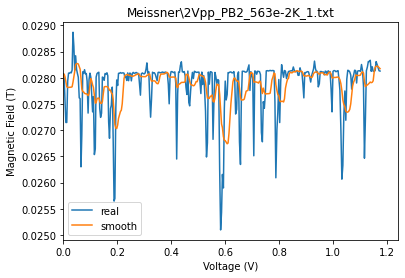

<Figure size 432x288 with 0 Axes>

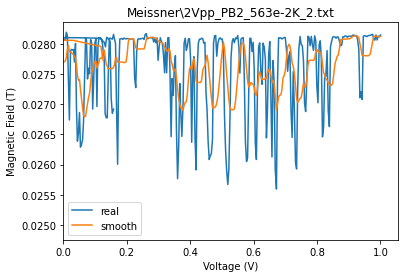

<Figure size 432x288 with 0 Axes>

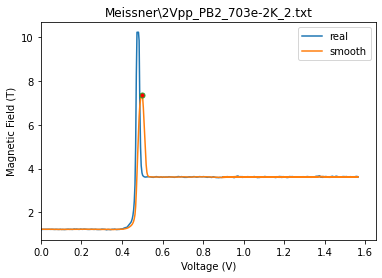

<Figure size 432x288 with 0 Axes>

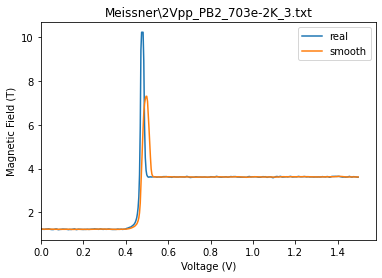

<Figure size 432x288 with 0 Axes>

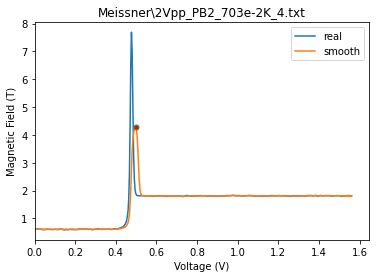

<Figure size 432x288 with 0 Axes>

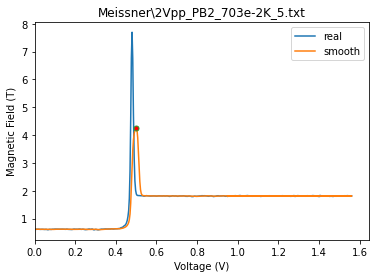

<Figure size 432x288 with 0 Axes>

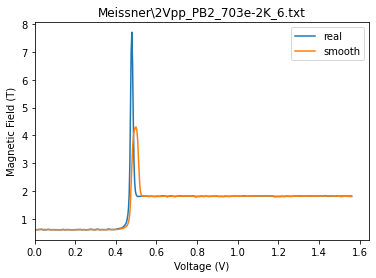

<Figure size 432x288 with 0 Axes>

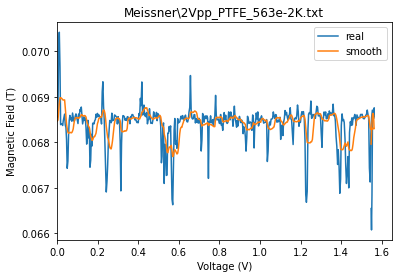

<Figure size 432x288 with 0 Axes>

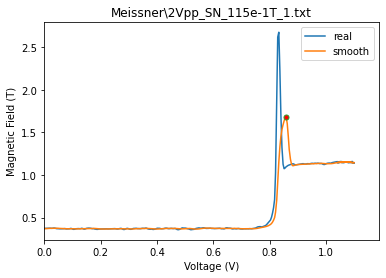

<Figure size 432x288 with 0 Axes>

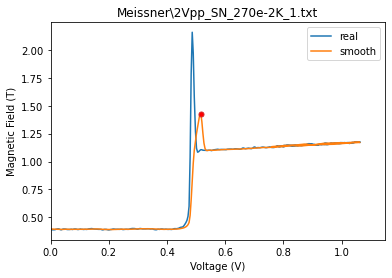

<Figure size 432x288 with 0 Axes>

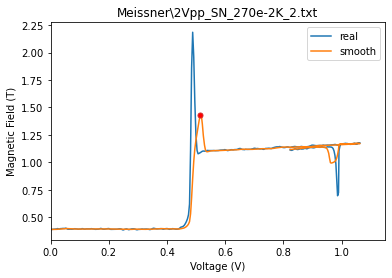

<Figure size 432x288 with 0 Axes>

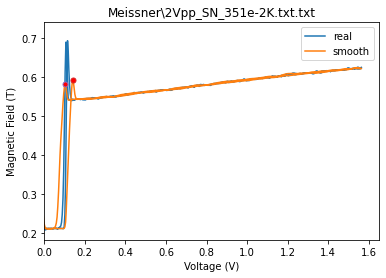

<Figure size 432x288 with 0 Axes>

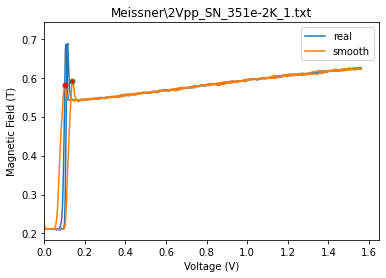

<Figure size 432x288 with 0 Axes>

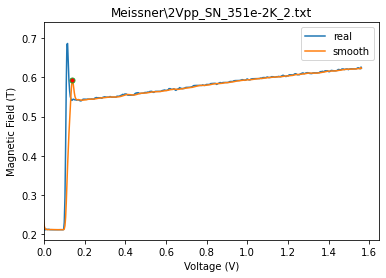

<Figure size 432x288 with 0 Axes>

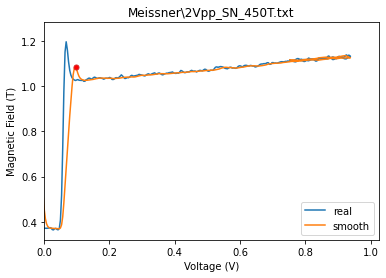

<Figure size 432x288 with 0 Axes>

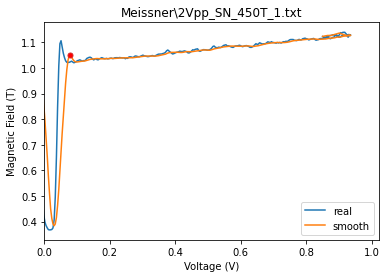

<Figure size 432x288 with 0 Axes>

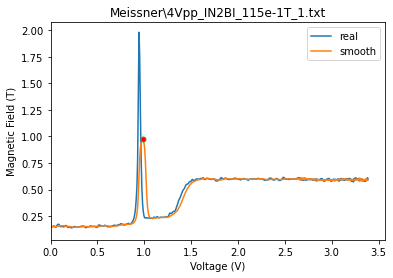

<Figure size 432x288 with 0 Axes>

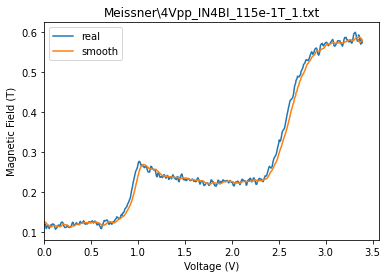

<Figure size 432x288 with 0 Axes>

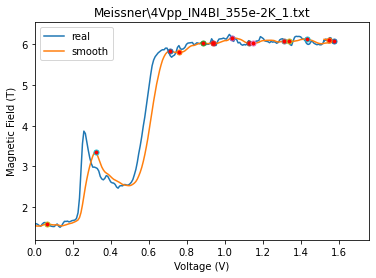

<Figure size 432x288 with 0 Axes>

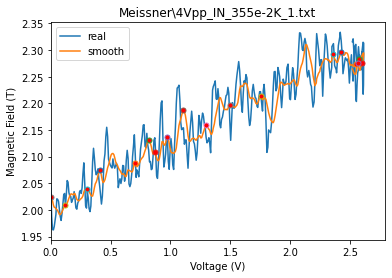

<Figure size 432x288 with 0 Axes>

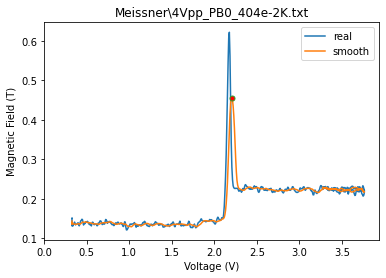

<Figure size 432x288 with 0 Axes>

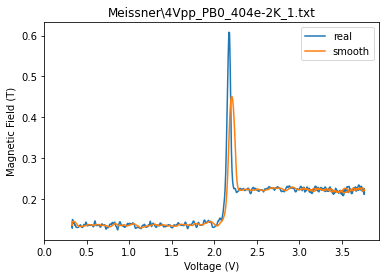

<Figure size 432x288 with 0 Axes>

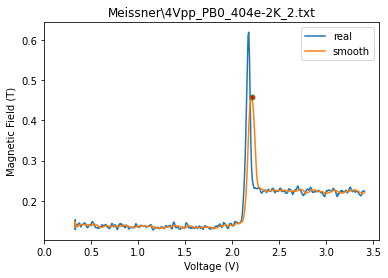

<Figure size 432x288 with 0 Axes>

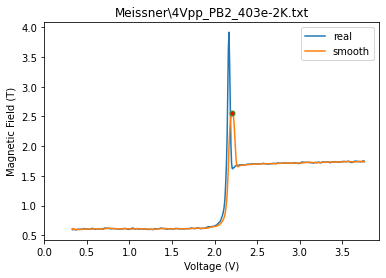

<Figure size 432x288 with 0 Axes>

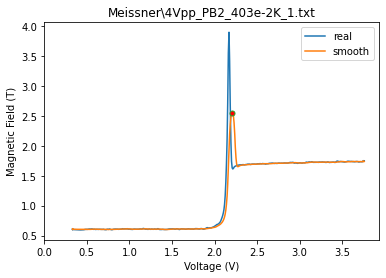

<Figure size 432x288 with 0 Axes>

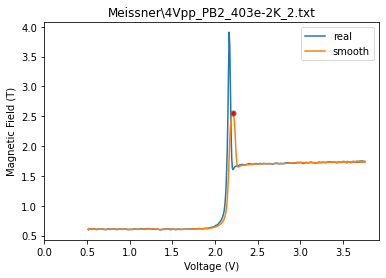

<Figure size 432x288 with 0 Axes>

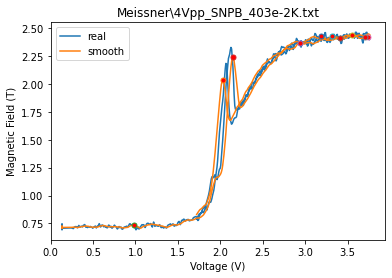

<Figure size 432x288 with 0 Axes>

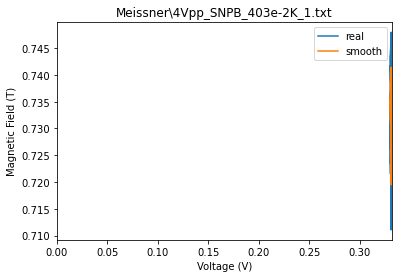

<Figure size 432x288 with 0 Axes>

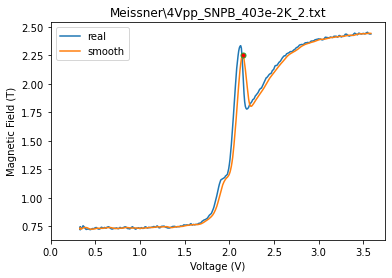

<Figure size 432x288 with 0 Axes>

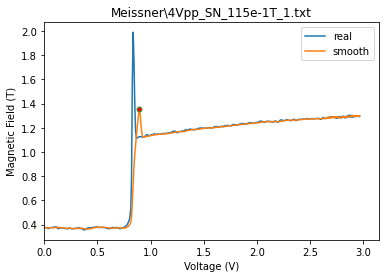

<Figure size 432x288 with 0 Axes>

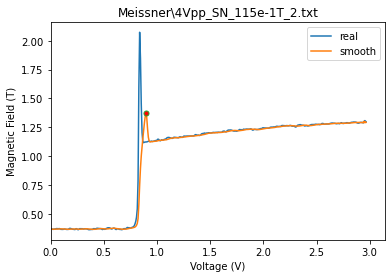

<Figure size 432x288 with 0 Axes>

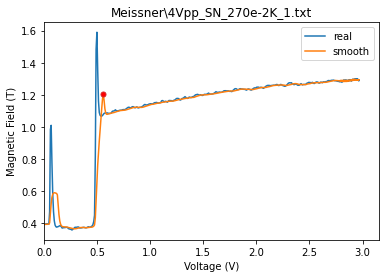

<Figure size 432x288 with 0 Axes>

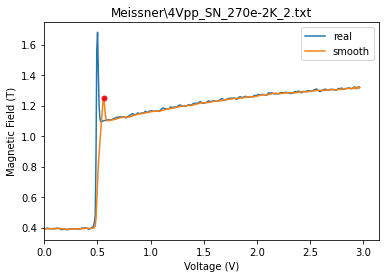

<Figure size 432x288 with 0 Axes>

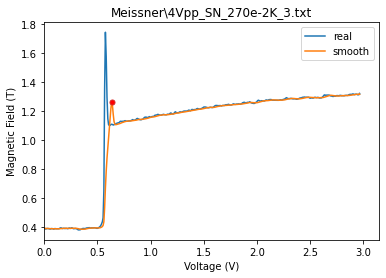

<Figure size 432x288 with 0 Axes>

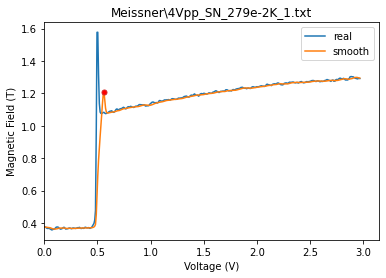

<Figure size 432x288 with 0 Axes>

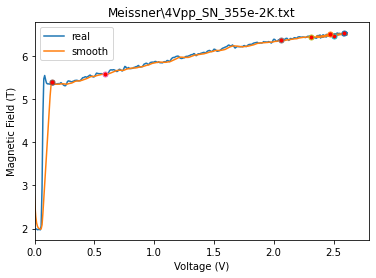

<Figure size 432x288 with 0 Axes>

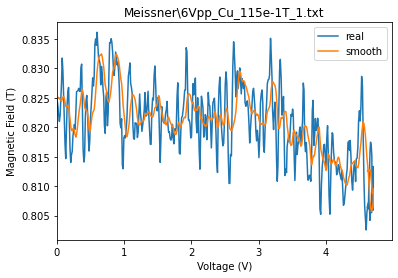

<Figure size 432x288 with 0 Axes>

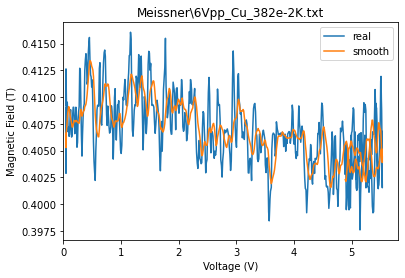

<Figure size 432x288 with 0 Axes>

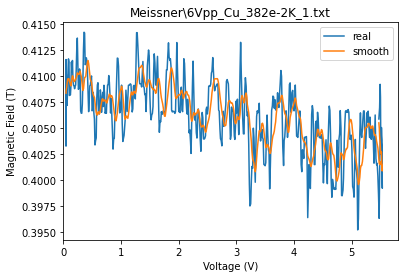

<Figure size 432x288 with 0 Axes>

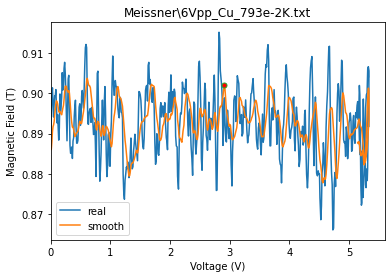

<Figure size 432x288 with 0 Axes>

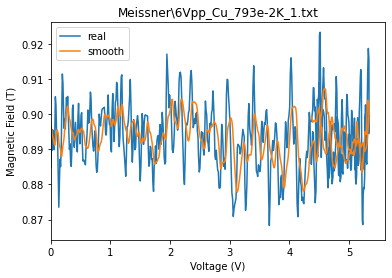

<Figure size 432x288 with 0 Axes>

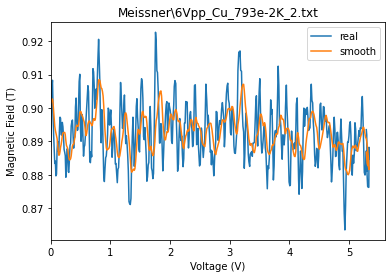

<Figure size 432x288 with 0 Axes>

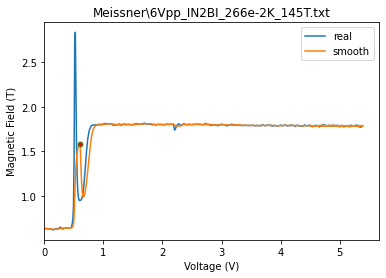

<Figure size 432x288 with 0 Axes>

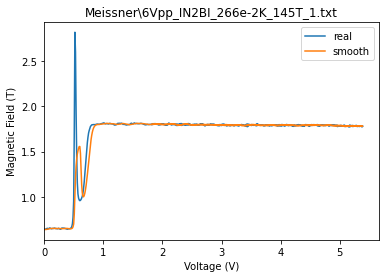

<Figure size 432x288 with 0 Axes>

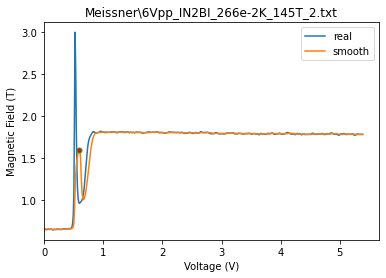

<Figure size 432x288 with 0 Axes>

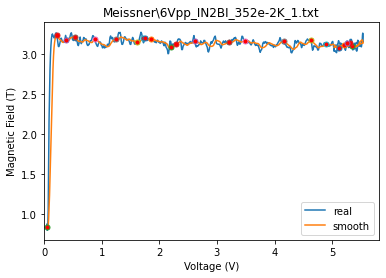

<Figure size 432x288 with 0 Axes>

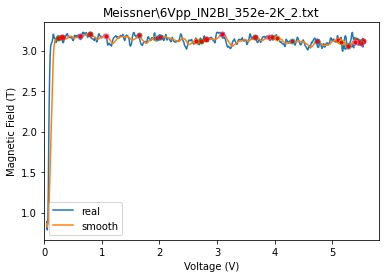

<Figure size 432x288 with 0 Axes>

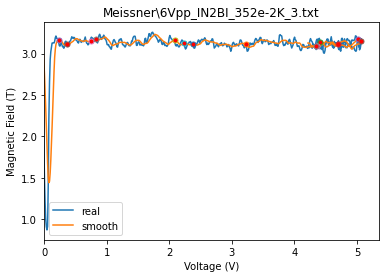

<Figure size 432x288 with 0 Axes>

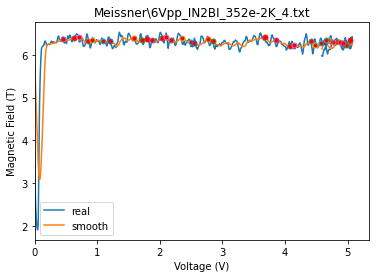

<Figure size 432x288 with 0 Axes>

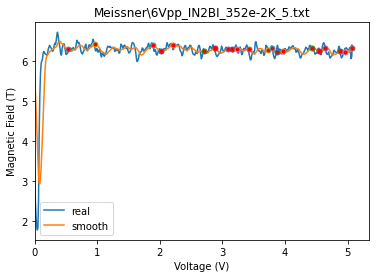

<Figure size 432x288 with 0 Axes>

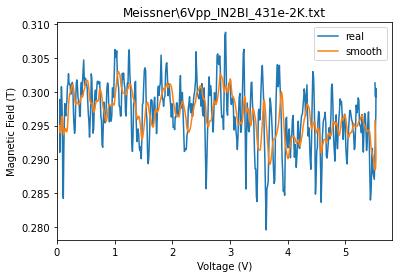

<Figure size 432x288 with 0 Axes>

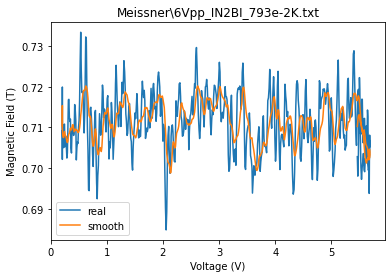

<Figure size 432x288 with 0 Axes>

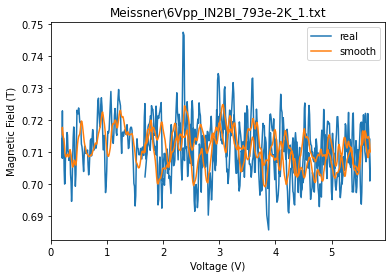

<Figure size 432x288 with 0 Axes>

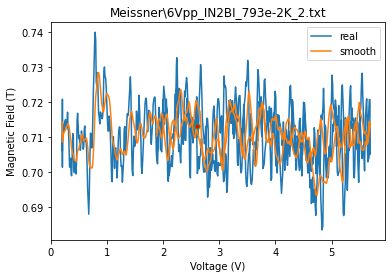

<Figure size 432x288 with 0 Axes>

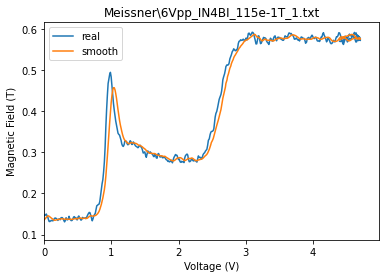

<Figure size 432x288 with 0 Axes>

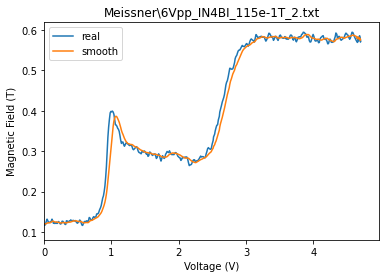

<Figure size 432x288 with 0 Axes>

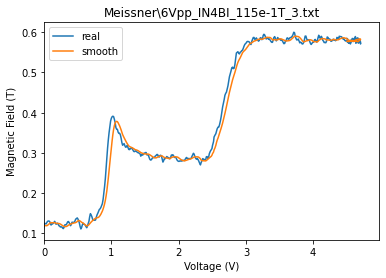

<Figure size 432x288 with 0 Axes>

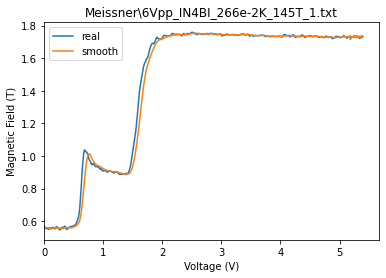

<Figure size 432x288 with 0 Axes>

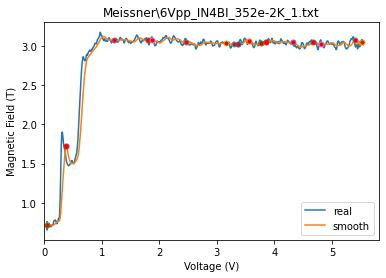

<Figure size 432x288 with 0 Axes>

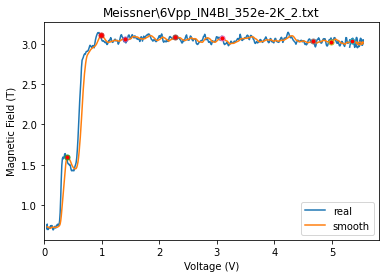

<Figure size 432x288 with 0 Axes>

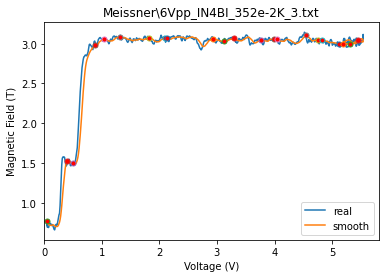

<Figure size 432x288 with 0 Axes>

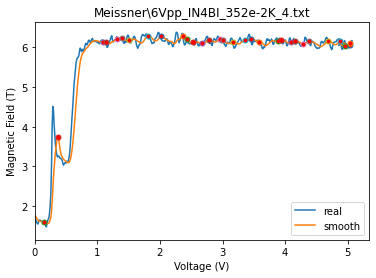

<Figure size 432x288 with 0 Axes>

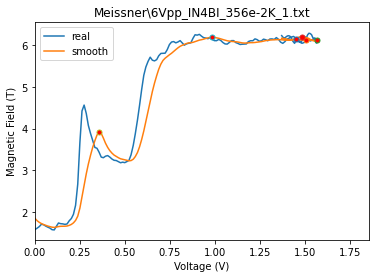

<Figure size 432x288 with 0 Axes>

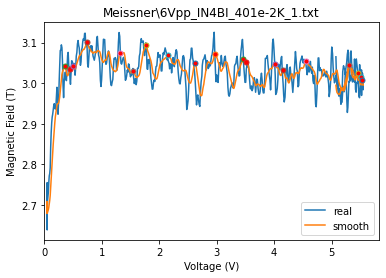

<Figure size 432x288 with 0 Axes>

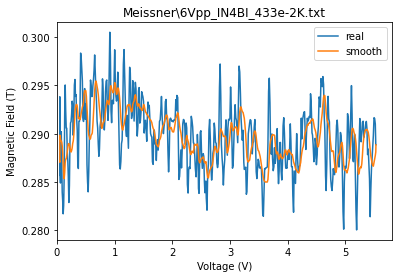

<Figure size 432x288 with 0 Axes>

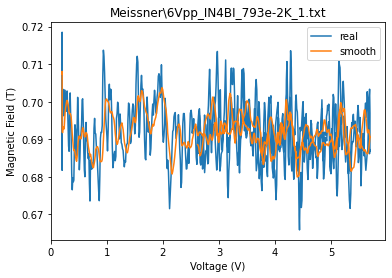

<Figure size 432x288 with 0 Axes>

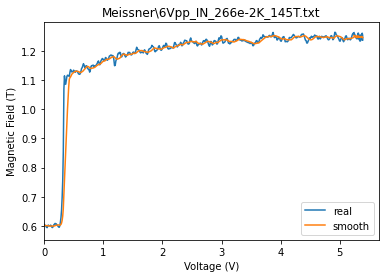

<Figure size 432x288 with 0 Axes>

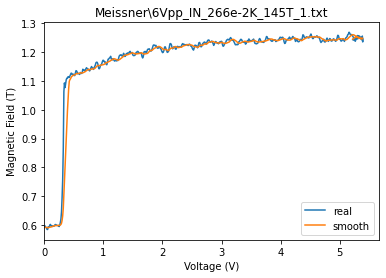

<Figure size 432x288 with 0 Axes>

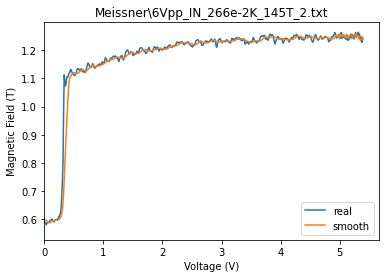

<Figure size 432x288 with 0 Axes>

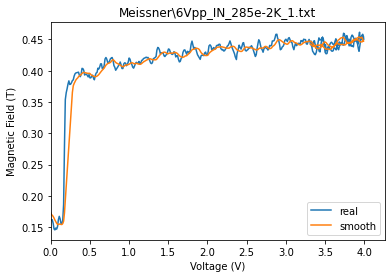

<Figure size 432x288 with 0 Axes>

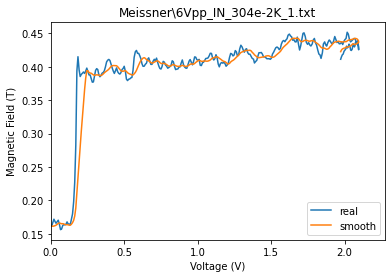

<Figure size 432x288 with 0 Axes>

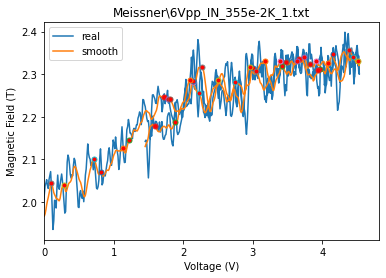

<Figure size 432x288 with 0 Axes>

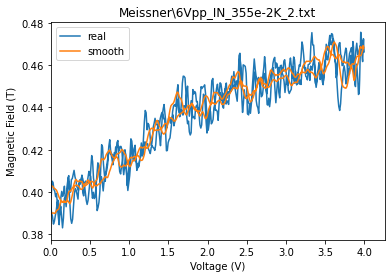

<Figure size 432x288 with 0 Axes>

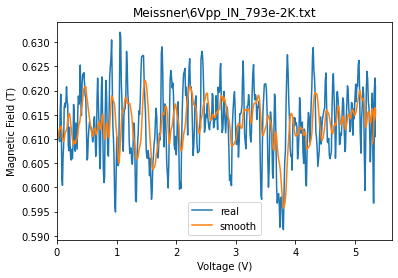

<Figure size 432x288 with 0 Axes>

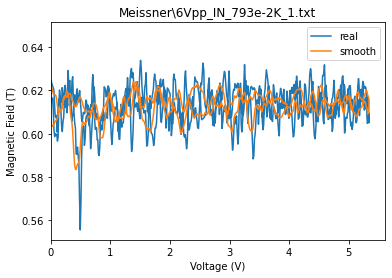

<Figure size 432x288 with 0 Axes>

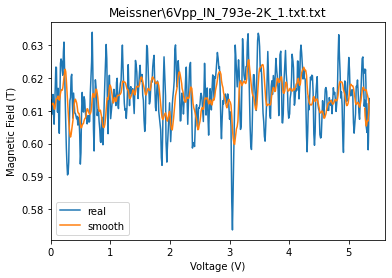

<Figure size 432x288 with 0 Axes>

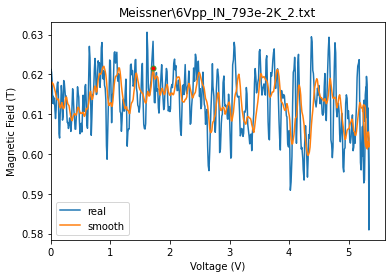

<Figure size 432x288 with 0 Axes>

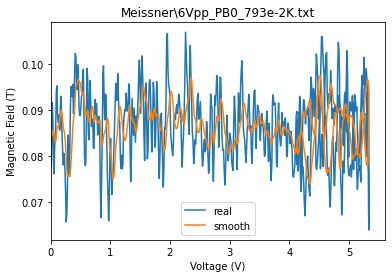

<Figure size 432x288 with 0 Axes>

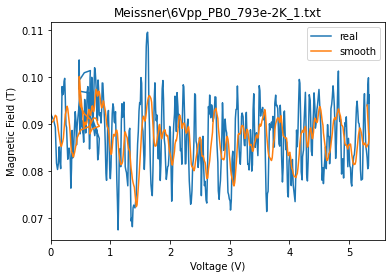

<Figure size 432x288 with 0 Axes>

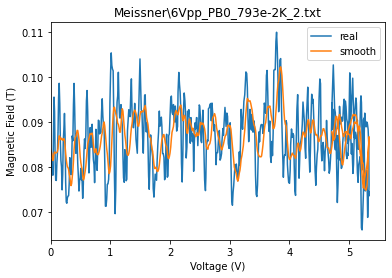

<Figure size 432x288 with 0 Axes>

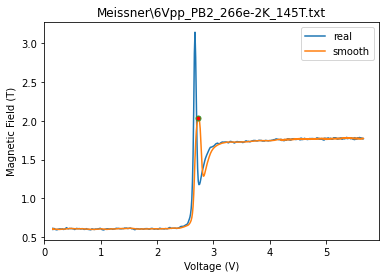

<Figure size 432x288 with 0 Axes>

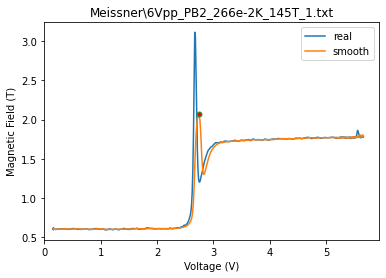

<Figure size 432x288 with 0 Axes>

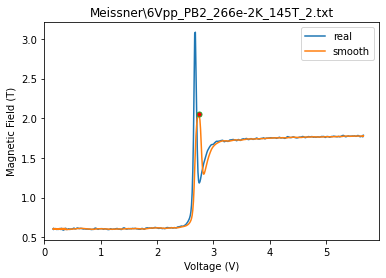

<Figure size 432x288 with 0 Axes>

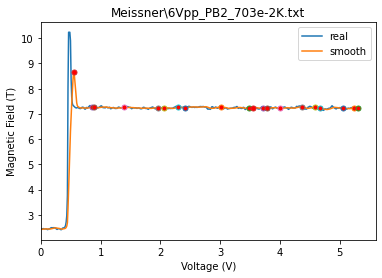

<Figure size 432x288 with 0 Axes>

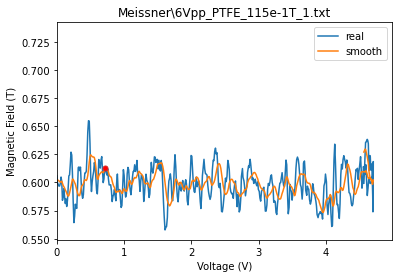

<Figure size 432x288 with 0 Axes>

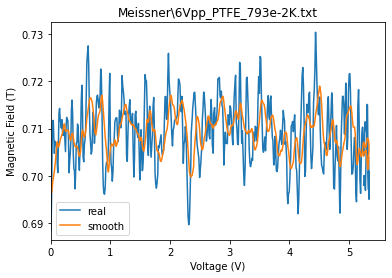

<Figure size 432x288 with 0 Axes>

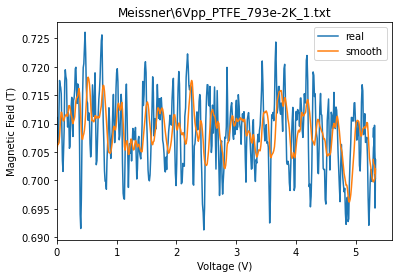

<Figure size 432x288 with 0 Axes>

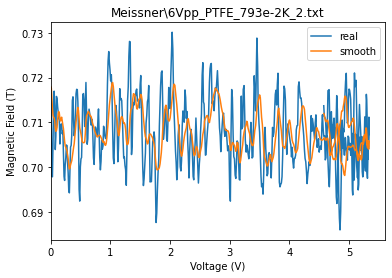

<Figure size 432x288 with 0 Axes>

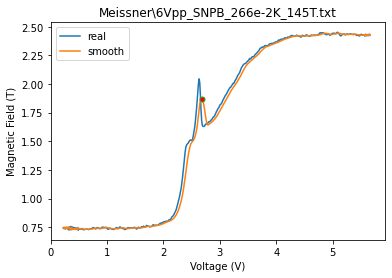

<Figure size 432x288 with 0 Axes>

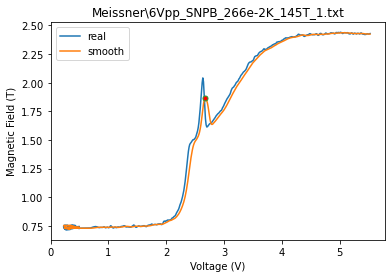

<Figure size 432x288 with 0 Axes>

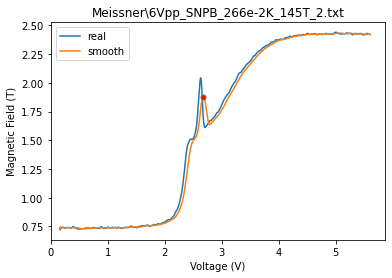

<Figure size 432x288 with 0 Axes>

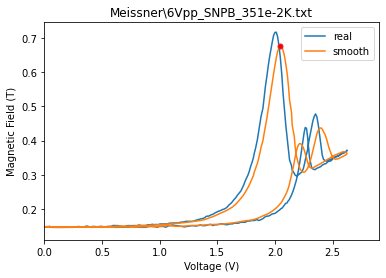

<Figure size 432x288 with 0 Axes>

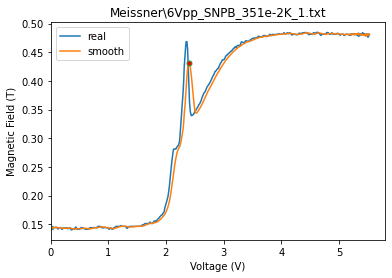

<Figure size 432x288 with 0 Axes>

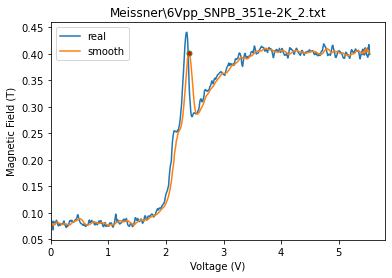

<Figure size 432x288 with 0 Axes>

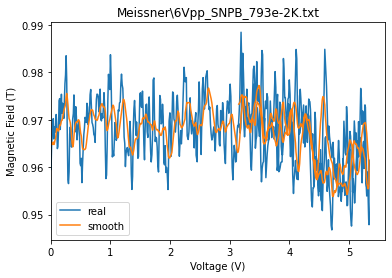

<Figure size 432x288 with 0 Axes>

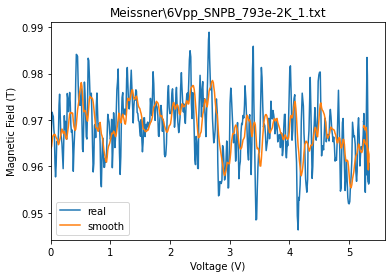

<Figure size 432x288 with 0 Axes>

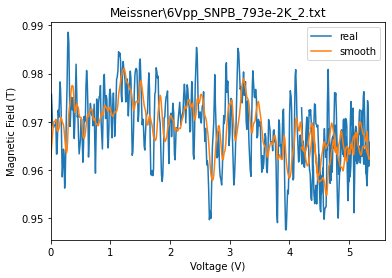

<Figure size 432x288 with 0 Axes>

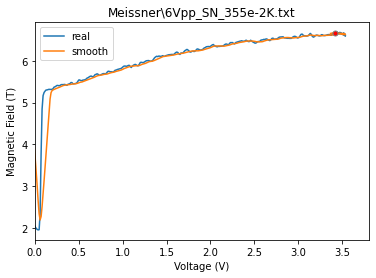

<Figure size 432x288 with 0 Axes>

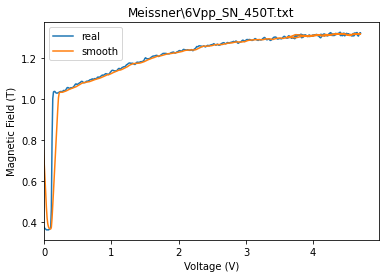

<Figure size 432x288 with 0 Axes>

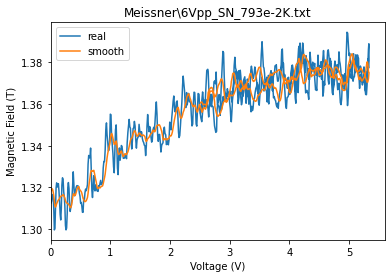

<Figure size 432x288 with 0 Axes>

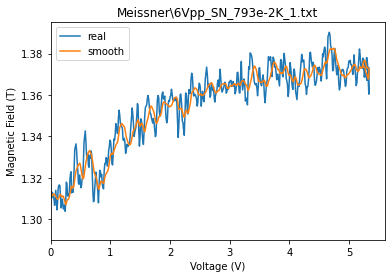

<Figure size 432x288 with 0 Axes>

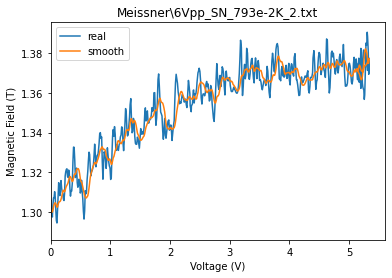

In [12]:
#determinr HC at zero temperature and Tc by doing a fit 
files = glob.glob('Meissner/*.txt')
files.sort()

PB0 = [[], []]
PB1 = [[], []]

IN = [[], []]
PB2 = [[], []]
SNPB = [[], []]
Cu = [[], []]
PTFE = [[], []]
IN2BI = [[], []]
IN4BI = [[], []]
SN = [[], []]

all_samples = {"IN": IN, "PB2": PB2, "SNPB": SNPB, "Cu": Cu, "PTFE": PTFE, "IN2BI": IN2BI, "IN4BI": IN4BI, "SN": SN, "PB0": PB0, "PB1":PB1}


def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

for file in files:   
    df = pd.read_table(file,names = ['v0','v1','v2','v3'])
    
    row_drop1 = int(len(df['v0'])/2)
    row_drop2 = len(df['v0'])
    #print(row_drop1)
    #print(row_drop2)
    #print(len(df['v0']))
    df = df.drop(labels=range(row_drop1, row_drop2), axis=0)
    #print(len(df['v0']))
    df['smooth'] = df['v1'].rolling(window=10).mean()
    #df['smooth'] = scipy.signal.savgol_filter(df['v1'], 33, 3 )
    #print(df.keys())
    peak_positions = find_peaks(df['smooth'], height = .01 , threshold = .001 )
    #print(file)
    #print(type(peak_positions))
    #print(peak_positions)
    
    #if len(peak_positions) =! 0:
        #for i in peak_positions: 
            #print(i)
            #plt.plot(df['v0'][i], df['v1'][i], "ro")
    #sample_critical_B = df["v1"].max()
    
    index1_temp = find_nth(file, "_", 2) + 1
    index2_temp = find_nth(file, "K", 1)
    


    index1_name = find_nth(file, "_", 1) + 1 
    index2_name = find_nth(file, "_", 2) 
    
    sample_temperature = file[index1_temp:index2_temp]
    
    sample_name = file[index1_name: index2_name]
    #print(sample_name)
    
    if sample_name == "PTFE" and index2_temp == -1:
        #print("first")
        #print(sample_name)
        index1_temp = find_nth(file, "_", 2) + 1
        index2_temp = find_nth(file, "T", 2)
        #print(index1_temp)
        #print(index2_temp)
        
        sample_temperature = file[index1_temp:index2_temp]

    if index2_temp == -1: 
        index1_temp = find_nth(file, "_", 2) + 1
        index2_temp = find_nth(file, "T", 1)
        sample_temperature = file[index1_temp:index2_temp]
    #print(sample_temperature)
    #print(sample_name)
    #print("in between")
    
    sample_temperature = float(sample_temperature)
    #print(sample_temperature)
    all_samples[sample_name][0].append(sample_temperature)
    #all_samples[sample_name][1].append(sample_critical_B)
    
    
    


    
    
    plt.figure()
    df.plot(x = 'v0', y = ['v1', 'smooth'],label=['real', 'smooth'])
    #plt.show()
    #print(len(df))
    #print("peak positions points")
    #print(len(peak_positions[0]))
    for i in range(len(peak_positions[0])):
        #print(i)
        y = peak_positions[1]['peak_heights'][i]
        x = peak_positions[0][i]
        #print(y)
        plt.plot(df['v0'][x], y, marker="o", markersize=5, markerfacecolor= "red")
    plt.xlabel("Voltage (V)")
    plt.ylabel("Magnetic Field (T)")
    plt.xlim(left= 0)
    plt.title(file)
    
    #plt.legend()
#plt.close("all")

#print(len(all_samples))
#for sample in all_samples: #add some error bars 
    #print(sample)
    #plt.figure()
    #plt.plot(all_samples[sample][0], all_samples[sample][1], "o") 
    #plt.xlabel("Temperature (K)")
    #plt.ylabel("Critical Magnetic Field (T)")
    #plt.title(sample)

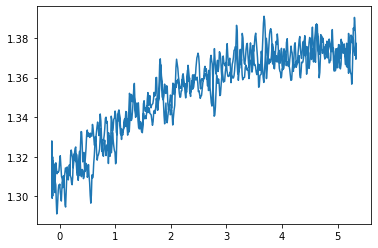

In [13]:
plt.figure()
df = pd.read_table(file,names = ['v0','v1','v2','v3'])
plt.plot(df['v0'],df['v1'],label=file)

In [ ]:
files

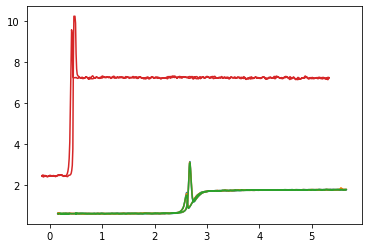

In [14]:
plt.figure()
files = glob.glob('Meissner/6Vpp*PB2*')
for file in files:
    df = pd.read_table(file,names = ['v0','v1','v2','v3'])
    plt.plot(df['v0'],df['v1'])